In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

In [3]:
import numpy as np
import scipy.stats as st

# returns confidence interval of mean
def confIntMean(a, conf=0.95):
    mean, sem, m = np.mean(a), st.sem(a), st.t.ppf((1+conf)/2., len(a)-1)
    return mean - m*sem, mean + m*sem

print (confIntMean([1,2,3,4,5],conf=0.95))

(1.0367568385224391, 4.9632431614775605)


[0.49123098725995556, 0.45624567088847373, 0.46521071512232154, 0.51392023676747733, 0.51157625977384613]
[1.0, 1.0, 1.0, 1.0, 1.0]


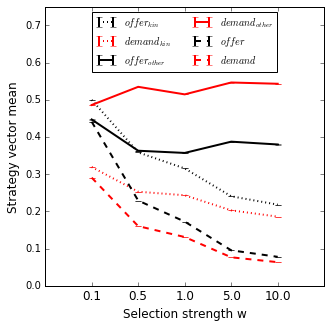

In [28]:
import numpy as np
import scipy.stats as ss
U=0.01;
Ws=(0.1,0.5,1.0,5.0,10.0)
#Fs=(0.1,0.5,1.0)
F=0.1
THs=(0.0,1.0)
anz=200
targetGen=4900000
figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
#    subplots_adjust(wspace=.25)
#    subplots_adjust(hspace=.25) 
THA=dict()
for TH in THs:
    psa=[]
    qsa=[]
    poa=[]
    qoa=[]
    pse=[]
    qse=[]
    poe=[]
    qoe=[]
    psci=[]
    qsci=[]
    poci=[]
    qoci=[]
    psv=[]
    qsv=[]
    pov=[]
    qov=[]
    psd=[]
    qsd=[]
    pod=[]
    qod=[]
    ida=[]
    tha=[]
    idv=[]
    thv=[]
    ide=[]
    the=[]
    vpo=[]
    vqo=[]
    for W in Ws:
        PS_LOD=[];
        QS_LOD=[];
        PO_LOD=[];
        QO_LOD=[];
        ID_LOD=[];
        TH_LOD=[];
        actAnz=anz;
        for N in range(0,anz):
#            filename="/Users/ahintze/Science/UltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
            filename="/Users/ArendHintze/Science/UltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
#            filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{3:03d}.txt".format(U,W,TH,N)
            #filename="/Users/arendhintze/iPhone/Science/tarnitaUltimatumGame/work/dataTag/LOD_TAG_{0:0.02f}_{1:0.01f}_{2:0.01f}_{4:0.1f}_{3:03d}.txt".format(U,W,F,N,TH)
            try:
                data=read_csv(filename, sep=",",na_values=[""," "])
                PS_LOD=concatenate([PS_LOD,data['ps']])
                QS_LOD=concatenate([QS_LOD,data['qs']])
                PO_LOD=concatenate([PO_LOD,data['po']])
                QO_LOD=concatenate([QO_LOD,data['qo']])
                ID_LOD=concatenate([ID_LOD,data['id']])
                TH_LOD=concatenate([TH_LOD,data['th']])
            except Exception:
                print ("missing file: "+filename)
                actAnz=actAnz-1
        psa.append(mean(PS_LOD))
        qsa.append(mean(QS_LOD))
        poa.append(mean(PO_LOD))
        qoa.append(mean(QO_LOD))
        ida.append(mean(ID_LOD))
        tha.append(mean(TH_LOD))
        pse.append(std(PS_LOD)/sqrt(float(len(PS_LOD))))
        qse.append(std(QS_LOD)/sqrt(float(len(QS_LOD))))
        poe.append(std(PO_LOD)/sqrt(float(len(PO_LOD))))
        qoe.append(std(QO_LOD)/sqrt(float(len(QO_LOD))))
        ide.append(std(ID_LOD)/sqrt(float(len(ID_LOD))))
        the.append(std(TH_LOD)/sqrt(float(len(TH_LOD))))
        psci.append(confIntMean(PS_LOD,conf=0.95)[0])
        qsci.append(confIntMean(QS_LOD,conf=0.95)[0])
        poci.append(confIntMean(PO_LOD,conf=0.95)[0])
        qoci.append(confIntMean(QO_LOD,conf=0.95)[0])
        psv.append(var(PS_LOD))
        qsv.append(var(QS_LOD))
        pov.append(var(PO_LOD))
        qov.append(var(QO_LOD))        
        psd.append(std(PS_LOD))
        qsd.append(std(QS_LOD))
        pod.append(std(PO_LOD))
        qod.append(std(QO_LOD))
        vpo.append(var(PO_LOD))
        vqo.append(var(QO_LOD))
        THA["{0} {1}".format(W,TH)]=TH_LOD
    #subplot(1,3,1)
    L=[]
    for w in Ws:
        L.append(str(w))
    xticks(range(0,len(Ws)),L,fontsize=12)
    axis((-1.0,len(Ws),0.0,0.75))
    #title('TH: '+str(TH))
    ylabel('Strategy vector mean',fontsize=12)
    xlabel('Selection strength w',fontsize=12)
    if (TH==0.0):
        errorbar(range(0,len(Ws)),psa,pse,fmt=':k',label=r"$\mathit{offer}_{kin}$",linewidth=2)
        errorbar(range(0,len(Ws)),qsa,qse,fmt=':r',label=r"$\mathit{demand}_{kin}$",linewidth=2)
        errorbar(range(0,len(Ws)),poa,poe,fmt='k',label=r"$\mathit{offer}_{other}$",linewidth=2)
        errorbar(range(0,len(Ws)),qoa,qoe,fmt='r',label=r"$\mathit{demand}_{other}$",linewidth=2)
        #errorbar(range(0,len(Ws)),tha,the,fmt='b')
        #errorbar(range(0,len(Ws)),ida,ide,fmt='g')
#        errorbar(range(0,len(Ws)),psa,psv,fmt=':k')
#        errorbar(range(0,len(Ws)),qsa,qsv,fmt=':r')
#        errorbar(range(0,len(Ws)),poa,pov,fmt='k')
#        errorbar(range(0,len(Ws)),qoa,qov,fmt='r')
#        errorbar(range(0,len(Ws)),psa,psci,fmt=':k')
#        errorbar(range(0,len(Ws)),qsa,qsci,fmt=':r')
#        errorbar(range(0,len(Ws)),poa,poci,fmt='k')
#        errorbar(range(0,len(Ws)),qoa,qoci,fmt='r')
        #errorbar(range(0,len(Ws)),psa,psd,fmt=':k')
        #errorbar(range(0,len(Ws)),qsa,qsd,fmt=':r')
        #errorbar(range(0,len(Ws)),poa,pod,fmt='k')
        #errorbar(range(0,len(Ws)),qoa,qod,fmt='r')

#        plot(range(0,len(Ws)),psa,':k')
#        plot(range(0,len(Ws)),qsa,':r')
#        plot(range(0,len(Ws)),poa,'k')
#        plot(range(0,len(Ws)),qoa,'r')
    else:
        errorbar(range(0,len(Ws)),psa,pse,fmt='--k',label=r"$\mathit{offer}$",linewidth=2)
        errorbar(range(0,len(Ws)),qsa,qse,fmt='--r',label=r"$\mathit{demand}$",linewidth=2)
#        plot(range(0,len(Ws)),ida,'--b')
#        plot(range(0,len(Ws)),tha,'--g')
#        errorbar(range(0,len(Ws)),psa,psv,fmt='--k')
#        errorbar(range(0,len(Ws)),qsa,qsv,fmt='--r')
#        errorbar(range(0,len(Ws)),psa,psci,fmt='--k')
#        errorbar(range(0,len(Ws)),qsa,qsci,fmt='--r')
        #errorbar(range(0,len(Ws)),psa,psd,fmt='--k')
        #errorbar(range(0,len(Ws)),qsa,qsd,fmt='--r')
#        plot(range(0,len(Ws)),psa,'--k')
#       plot(range(0,len(Ws)),qsa,'--r')
        #plot(range(0,len(Ws)),poa,'k')
        #plot(range(0,len(Ws)),qoa,'r')
    print(tha)
legend(loc="upper center",fontsize=10,ncol=2)
    #subplot(1,3,2)
    #plot(range(0,len(Ws)),tha,'black')
    #plot(range(0,len(Ws)),ida,'red')
    #xticks(range(0,len(Ws)),L)
    #title('TH: '+str(TH))
    #axis((-1.0,len(Ws),0.0,1.00))
    #subplot(1,3,3)
    #plot(range(0,len(Ws)),vpo,'black')
    #plot(range(0,len(Ws)),vqo,'red')
    #xticks(range(0,len(Ws)),L)
    #title('TH: '+str(TH))
#    axis((-1.0,len(Ws),0.0,1.00))
#    subplot(1,3,3)
#    imshow(R,interpolation='nearest',cmap='bone')
#    colorbar() 
savefig('comparisonTagNoTag.pdf')
savefig('comparisonTagNoTag.eps')

/Users/ArendHintze/miniconda2/envs/py3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


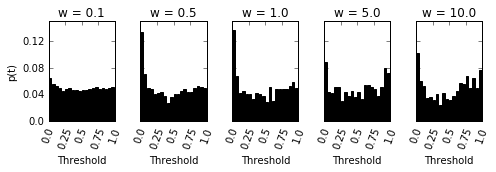

In [74]:
M=[]
N=20
u=1
figure(figsize=[7,2.5],tight_layout=True)
for TH in [0.0]:
    for W in Ws:
        X,Y=histogram(THA["{0} {1}".format(W,TH)],linspace(0.0,1.0,N+1))
        subplot(1,5,u)
        bar(range(N),numpy.array(X)/sum(X),color="k")
        xticks([0,5,10,15,20],["0.0","0.25","0.5","0.75","1.0"],rotation=70)
        title("w = "+str(W))
        if(u==1):
            yticks([0,0.04,0.08,0.12],['0.0','0.04','0.08','0.12'])
            ylabel("p(t)")
        else:
            yticks([0,0.04,0.08,0.12],["","","",""])
        xlabel("Threshold")
        axis([0,N,0,0.15])
        M.append(mean(THA["{0} {1}".format(W,TH)]))
        u=u+1
savefig("thresholds.pdf")
savefig("thresholds.eps")

#figure()
#plot(M)